<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Sentiment Analysis Model (Problem 1)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [ ]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.4.0


### GitHub + Colab

In [ ]:
#run for GitHub Colab
!git clone "https://github.com/OldManSteve/DL_Assg2.git"


Cloning into 'DL_Assg2'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 51 (delta 15), reused 42 (delta 9), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [ ]:
#GitHub Colab directory
# Directories for files
map_file = '/content/DL_Assg2/mapping.csv'
dataset_file = '/content/DL_Assg2/dataset.csv'

In [ ]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/DL_Assg2_Models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [ ]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv(map_file, delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [ ]:
# load the dataset
dat = pd.read_csv(dataset_file, delimiter=',')
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values

dat.head()

,TEXT,Label
0,Been friends since 7th grade. Look at us now w...,0
1,This is what it looks like when someone loves ...,1
2,RT @user this white family was invited to a Bl...,1
3,"Westenders @user #LAZzNation @ Weston, Toronto\n",2
4,Maxwell heads home @ Summa Akron City Hospital\n,0


In [ ]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example.split()) > max_len:
        max_len = len(example.split())
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  34


### 1.2 Data Processing


In [ ]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 10000  # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

def vectorize_sequences(sequences, dimension=5):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

X = pad_sequences(sequences, maxlen=max_len)
y = vectorize_sequences(labels)

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546, 5)


### 1.3 Data Sampling

In [ ]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
# Refer the report Appendix
# Please enter the random_state assigned to your group

## Step 2 – Develop a Sentiment Analysis Model

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #1 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 128)           70144     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 286,021
Trainable params: 286,021
Non-trainable params: 0
__________________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 97s 7ms/step - loss: 1.3072 - acc: 0.4305 - val_loss: 1.2068 - val_acc: 0.4556
Epoch 2/10
13614/13614 [==============================] - 98s 7ms/step - loss: 1.2113 - acc: 0.4476 - val_loss: 1.1958 - val_acc: 0.4642
Epoch 3/10
13614/13614 [==============================] - 97s 7ms/step - loss: 1.2034 - acc: 0.4558 - val_loss: 1.2194 - val_acc: 0.4573
Epoch 4/10
13614/13614 [==============================] - 97s 7ms/step - loss: 1.1958 - acc: 0.4597 - val_loss: 1.1853 - val_acc: 0.4687
Epoch 5/10
13614/13614 [==============================] - 98s 7ms/step - loss: 1.1903 - acc: 0.4635 - val_loss: 1.1788 - val_acc: 0.4680
Epoch 6/10
13614/13614 [==============================] - 97s 7ms/step - loss: 1.1894 - acc: 0.4630 - val_loss: 1.2080 - val_acc: 0.4736
Epoch 7/10
13614/13614 [==============================] - 97s 7ms/step - loss: 1.1898 - acc: 0.4635 - val_loss: 1.1848 - val_acc: 0.4778
Epoch 8/10
13614/13614 [=================

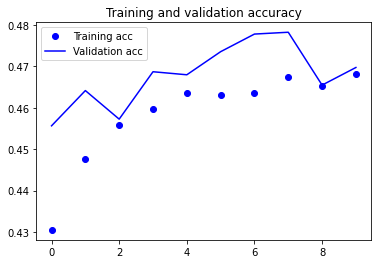

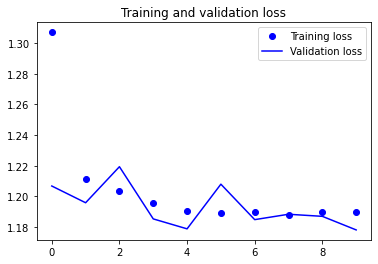

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_1.h5')
model.save('text_model_1.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #2 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 128)           70144     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 282,373
Trainable params: 282,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 98s 7ms/step - loss: 1.2960 - acc: 0.4357 - val_loss: 1.2064 - val_acc: 0.4562
Epoch 2/10
13614/13614 [==============================] - 95s 7ms/step - loss: 1.2100 - acc: 0.4521 - val_loss: 1.2000 - val_acc: 0.4559
Epoch 3/10
13614/13614 [==============================] - 95s 7ms/step - loss: 1.1984 - acc: 0.4583 - val_loss: 1.1842 - val_acc: 0.4683
Epoch 4/10
13614/13614 [==============================] - 94s 7ms/step - loss: 1.1897 - acc: 0.4624 - val_loss: 1.1795 - val_acc: 0.4724
Epoch 5/10
13614/13614 [==============================] - 95s 7ms/step - loss: 1.1857 - acc: 0.4654 - val_loss: 1.1776 - val_acc: 0.4674
Epoch 6/10
13614/13614 [==============================] - 94s 7ms/step - loss: 1.1835 - acc: 0.4658 - val_loss: 1.1772 - val_acc: 0.4747
Epoch 7/10
13614/13614 [==============================] - 94s 7ms/step - loss: 1.1820 - acc: 0.4663 - val_loss: 1.1754 - val_acc: 0.4775
Epoch 8/10
13614/13614 [=================

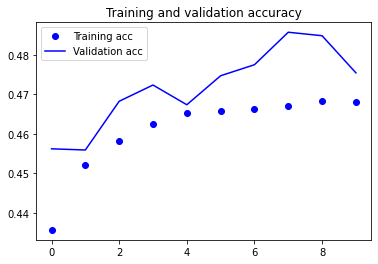

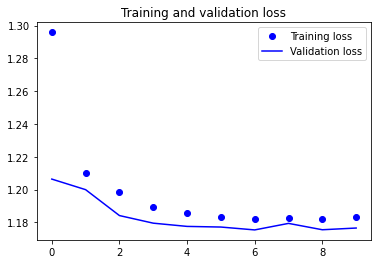

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_2.h5')
model.save('text_model_2.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #3 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(64))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 128)           70144     
_________________________________________________________________
lstm_1 (LSTM)                (None, 34, 128)           131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 34, 64)            49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 158s 12ms/step - loss: 1.3534 - acc: 0.4294 - val_loss: 1.2160 - val_acc: 0.4508
Epoch 2/10
13614/13614 [==============================] - 155s 11ms/step - loss: 1.2139 - acc: 0.4496 - val_loss: 1.2005 - val_acc: 0.4574
Epoch 3/10
13614/13614 [==============================] - 156s 11ms/step - loss: 1.2128 - acc: 0.4483 - val_loss: 1.2041 - val_acc: 0.4304
Epoch 4/10
13614/13614 [==============================] - 155s 11ms/step - loss: 1.2087 - acc: 0.4521 - val_loss: 1.2009 - val_acc: 0.4504
Epoch 5/10
13614/13614 [==============================] - 156s 11ms/step - loss: 1.2095 - acc: 0.4511 - val_loss: 1.2115 - val_acc: 0.4608
Epoch 6/10
13614/13614 [==============================] - 157s 12ms/step - loss: 1.2089 - acc: 0.4543 - val_loss: 1.1978 - val_acc: 0.4609
Epoch 7/10
13614/13614 [==============================] - 156s 11ms/step - loss: 1.2150 - acc: 0.4498 - val_loss: 1.2161 - val_acc: 0.4627
Epoch 8/10
13614/13614 [===

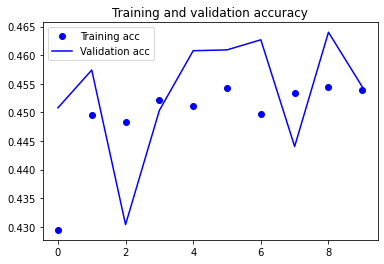

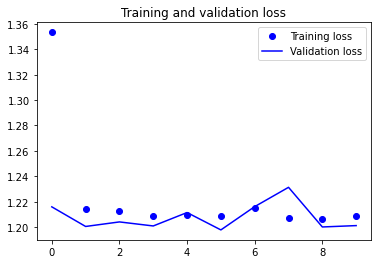

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_3.h5')
model.save('text_model_3.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #4 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 128)           70144     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 282,373
Trainable params: 282,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 99s 7ms/step - loss: 1.2905 - acc: 0.4357 - val_loss: 1.2004 - val_acc: 0.4540
Epoch 2/10
13614/13614 [==============================] - 94s 7ms/step - loss: 1.2053 - acc: 0.4563 - val_loss: 1.2083 - val_acc: 0.4534
Epoch 3/10
13614/13614 [==============================] - 94s 7ms/step - loss: 1.1939 - acc: 0.4599 - val_loss: 1.1803 - val_acc: 0.4702
Epoch 4/10
13614/13614 [==============================] - 95s 7ms/step - loss: 1.1875 - acc: 0.4611 - val_loss: 1.1778 - val_acc: 0.4658
Epoch 5/10
13614/13614 [==============================] - 95s 7ms/step - loss: 1.1850 - acc: 0.4687 - val_loss: 1.1736 - val_acc: 0.4769
Epoch 6/10
13614/13614 [==============================] - 95s 7ms/step - loss: 1.1846 - acc: 0.4641 - val_loss: 1.1804 - val_acc: 0.4697
Epoch 7/10
13614/13614 [==============================] - 96s 7ms/step - loss: 1.1823 - acc: 0.4689 - val_loss: 1.1762 - val_acc: 0.4788
Epoch 8/10
13614/13614 [=================

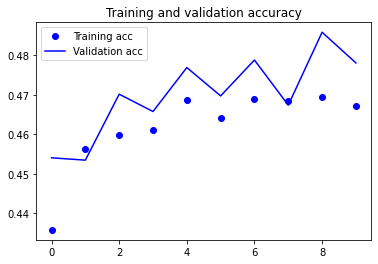

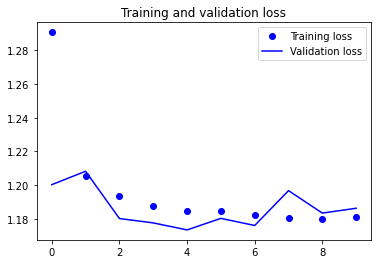

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_4.h5')
model.save('text_model_4.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #5 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(256, return_sequences=True))
model.add(layers.LSTM(256, return_sequences=True))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 256)           271360    
_________________________________________________________________
lstm_1 (LSTM)                (None, 34, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 34, 128)           197120    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 164s 12ms/step - loss: 1.3582 - acc: 0.4247 - val_loss: 1.2139 - val_acc: 0.4407
Epoch 2/10
13614/13614 [==============================] - 163s 12ms/step - loss: 1.2276 - acc: 0.4350 - val_loss: 1.2030 - val_acc: 0.4495
Epoch 3/10
13614/13614 [==============================] - 163s 12ms/step - loss: 1.2193 - acc: 0.4407 - val_loss: 1.2111 - val_acc: 0.4479
Epoch 4/10
13614/13614 [==============================] - 163s 12ms/step - loss: 1.2195 - acc: 0.4430 - val_loss: 1.2079 - val_acc: 0.4459
Epoch 5/10
13614/13614 [==============================] - 163s 12ms/step - loss: 1.2227 - acc: 0.4422 - val_loss: 1.1966 - val_acc: 0.4574
Epoch 6/10
13614/13614 [==============================] - 163s 12ms/step - loss: 1.2301 - acc: 0.4404 - val_loss: 1.1965 - val_acc: 0.4584
Epoch 7/10
13614/13614 [==============================] - 163s 12ms/step - loss: 1.2316 - acc: 0.4418 - val_loss: 1.2116 - val_acc: 0.4473
Epoch 8/10
13614/13614 [===

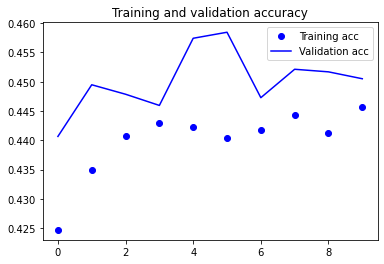

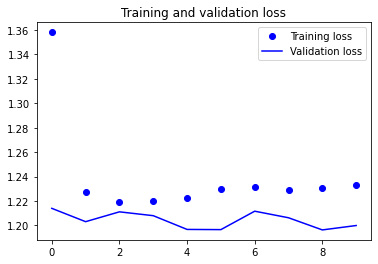

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_5.h5')
model.save('text_model_5.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #6 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 8)             80000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 34, 64)            18688     
_________________________________________________________________
lstm_5 (LSTM)                (None, 34, 64)            33024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 34, 32)            12416     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 171s 13ms/step - loss: 1.3898 - acc: 0.4268 - val_loss: 1.2349 - val_acc: 0.4517
Epoch 2/10
13614/13614 [==============================] - 168s 12ms/step - loss: 1.2203 - acc: 0.4455 - val_loss: 1.2002 - val_acc: 0.4514
Epoch 3/10
13614/13614 [==============================] - 174s 13ms/step - loss: 1.2106 - acc: 0.4494 - val_loss: 1.2011 - val_acc: 0.4552
Epoch 4/10
13614/13614 [==============================] - 171s 13ms/step - loss: 1.2101 - acc: 0.4492 - val_loss: 1.2042 - val_acc: 0.4578
Epoch 5/10
13614/13614 [==============================] - 173s 13ms/step - loss: 1.2084 - acc: 0.4529 - val_loss: 1.2051 - val_acc: 0.4593
Epoch 6/10
13614/13614 [==============================] - 173s 13ms/step - loss: 1.2057 - acc: 0.4537 - val_loss: 1.2212 - val_acc: 0.4608
Epoch 7/10
13614/13614 [==============================] - 175s 13ms/step - loss: 1.2070 - acc: 0.4485 - val_loss: 1.1950 - val_acc: 0.4606
Epoch 8/10
13614/13614 [===

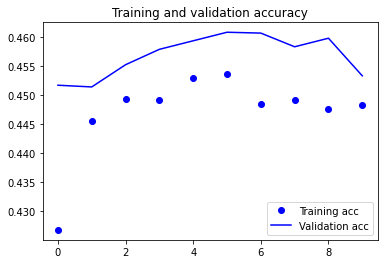

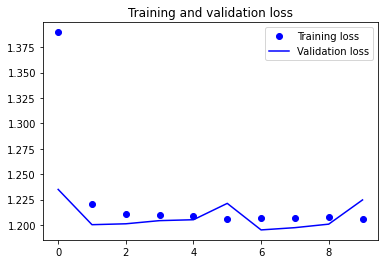

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_6.h5')
model.save('text_model_6.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #7 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 128)           70144     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 282,373
Trainable params: 282,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-2),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 111s 8ms/step - loss: 1.3535 - acc: 0.4022 - val_loss: 1.2251 - val_acc: 0.4420
Epoch 2/10
13614/13614 [==============================] - 111s 8ms/step - loss: 1.3566 - acc: 0.4087 - val_loss: 1.2930 - val_acc: 0.4443
Epoch 3/10
13614/13614 [==============================] - 110s 8ms/step - loss: 1.3582 - acc: 0.4110 - val_loss: 1.3026 - val_acc: 0.4311
Epoch 4/10
13614/13614 [==============================] - 112s 8ms/step - loss: 1.3662 - acc: 0.4114 - val_loss: 1.3093 - val_acc: 0.4414
Epoch 5/10
13614/13614 [==============================] - 110s 8ms/step - loss: 1.3614 - acc: 0.4157 - val_loss: 1.4232 - val_acc: 0.3728
Epoch 6/10
13614/13614 [==============================] - 109s 8ms/step - loss: 1.3553 - acc: 0.4191 - val_loss: 1.4739 - val_acc: 0.4368
Epoch 7/10
13614/13614 [==============================] - 109s 8ms/step - loss: 1.4179 - acc: 0.4152 - val_loss: 1.3930 - val_acc: 0.3812
Epoch 8/10
13614/13614 [==========

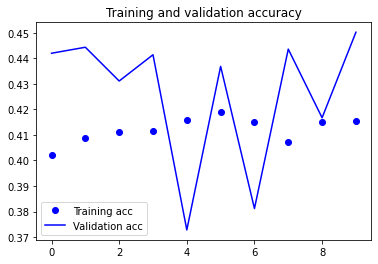

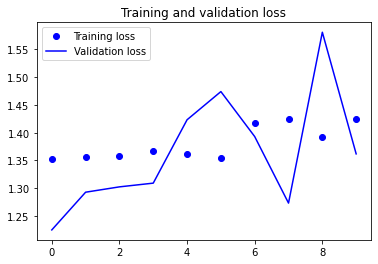

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_7.h5')
model.save('text_model_7.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #8 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 64)            18688     
_________________________________________________________________
lstm_1 (LSTM)                (None, 34, 64)            33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 34, 32)            12416     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-2),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 163s 12ms/step - loss: 1.3130 - acc: 0.4184 - val_loss: 1.2629 - val_acc: 0.4471
Epoch 2/10
13614/13614 [==============================] - 164s 12ms/step - loss: 1.2922 - acc: 0.4264 - val_loss: 1.2083 - val_acc: 0.4398
Epoch 3/10
13614/13614 [==============================] - 164s 12ms/step - loss: 1.3415 - acc: 0.4196 - val_loss: 1.6366 - val_acc: 0.4420
Epoch 4/10
13614/13614 [==============================] - 164s 12ms/step - loss: 1.3321 - acc: 0.4229 - val_loss: 1.2720 - val_acc: 0.4316
Epoch 5/10
13614/13614 [==============================] - 163s 12ms/step - loss: 1.3322 - acc: 0.4224 - val_loss: 1.2672 - val_acc: 0.4288
Epoch 6/10
13614/13614 [==============================] - 164s 12ms/step - loss: 1.3917 - acc: 0.4182 - val_loss: 1.3529 - val_acc: 0.3540
Epoch 7/10
13614/13614 [==============================] - 164s 12ms/step - loss: 1.3560 - acc: 0.4104 - val_loss: 1.3025 - val_acc: 0.4370
Epoch 8/10
13614/13614 [===

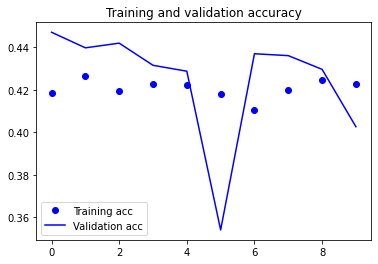

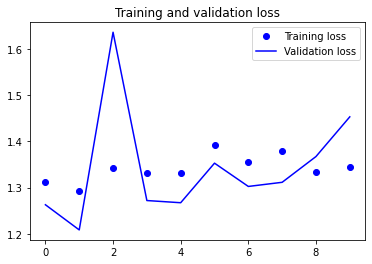

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_8.h5')
model.save('text_model_8.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #9 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
____________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 292s 21ms/step - loss: 1.2661 - acc: 0.4495 - val_loss: 1.1543 - val_acc: 0.4972
Epoch 2/10
13614/13614 [==============================] - 287s 21ms/step - loss: 1.1598 - acc: 0.4929 - val_loss: 1.1564 - val_acc: 0.5100
Epoch 3/10
13614/13614 [==============================] - 286s 21ms/step - loss: 1.1317 - acc: 0.5107 - val_loss: 1.1223 - val_acc: 0.5254
Epoch 4/10
13614/13614 [==============================] - 285s 21ms/step - loss: 1.1166 - acc: 0.5184 - val_loss: 1.1745 - val_acc: 0.5091
Epoch 5/10
13614/13614 [==============================] - 285s 21ms/step - loss: 1.0980 - acc: 0.5312 - val_loss: 1.1076 - val_acc: 0.5333
Epoch 6/10
13614/13614 [==============================] - 285s 21ms/step - loss: 1.0849 - acc: 0.5418 - val_loss: 1.1306 - val_acc: 0.5442
Epoch 7/10
13614/13614 [==============================] - 286s 21ms/step - loss: 1.0760 - acc: 0.5448 - val_loss: 1.0952 - val_acc: 0.5473
Epoch 8/10
13614/13614 [===

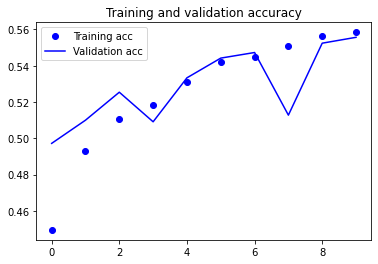

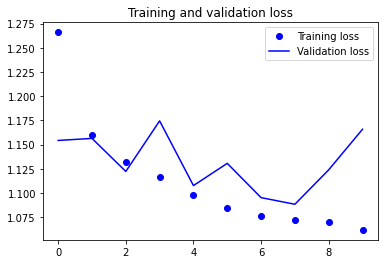

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_9.h5')
model.save('text_model_9.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #10 (Replicate as necessary for other models)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 8)             80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
__________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/20
13614/13614 [==============================] - 363s 27ms/step - loss: 1.2525 - acc: 0.4421 - val_loss: 1.2132 - val_acc: 0.4655
Epoch 2/20
13614/13614 [==============================] - 363s 27ms/step - loss: 1.2040 - acc: 0.4606 - val_loss: 1.1896 - val_acc: 0.4766
Epoch 3/20
13614/13614 [==============================] - 364s 27ms/step - loss: 1.1821 - acc: 0.4752 - val_loss: 1.1664 - val_acc: 0.4844
Epoch 4/20
13614/13614 [==============================] - 366s 27ms/step - loss: 1.1642 - acc: 0.4863 - val_loss: 1.1701 - val_acc: 0.4940
Epoch 5/20
13614/13614 [==============================] - 364s 27ms/step - loss: 1.1524 - acc: 0.4941 - val_loss: 1.1563 - val_acc: 0.4943
Epoch 6/20
13614/13614 [==============================] - 366s 27ms/step - loss: 1.1418 - acc: 0.5017 - val_loss: 1.1501 - val_acc: 0.5082
Epoch 7/20
13614/13614 [==============================] - 371s 27ms/step - loss: 1.1302 - acc: 0.5094 - val_loss: 1.1394 - val_acc: 0.5162
Epoch 8/20
13614/13614 [===

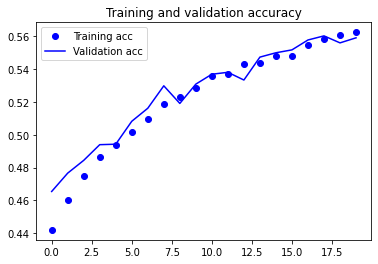

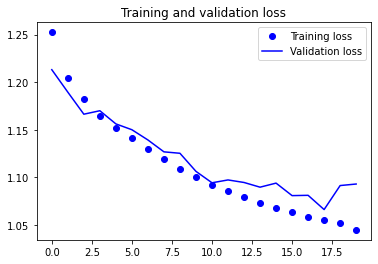

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_10.h5')
model.save('text_model_10.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #11 (Replicate as necessary for other models)


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
____________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 323s 24ms/step - loss: 1.1974 - acc: 0.4779 - val_loss: 1.0928 - val_acc: 0.5322
Epoch 2/10
13614/13614 [==============================] - 323s 24ms/step - loss: 1.0499 - acc: 0.5458 - val_loss: 1.0545 - val_acc: 0.5482
Epoch 3/10
13614/13614 [==============================] - 324s 24ms/step - loss: 0.9942 - acc: 0.5765 - val_loss: 1.0440 - val_acc: 0.5543
Epoch 4/10
13614/13614 [==============================] - 324s 24ms/step - loss: 0.9367 - acc: 0.6077 - val_loss: 1.0064 - val_acc: 0.5733
Epoch 5/10
13614/13614 [==============================] - 323s 24ms/step - loss: 0.8777 - acc: 0.6395 - val_loss: 1.0152 - val_acc: 0.5781
Epoch 6/10
13614/13614 [==============================] - 323s 24ms/step - loss: 0.8296 - acc: 0.6674 - val_loss: 1.0138 - val_acc: 0.5840
Epoch 7/10
13614/13614 [==============================] - 323s 24ms/step - loss: 0.7862 - acc: 0.6905 - val_loss: 1.0112 - val_acc: 0.5942
Epoch 8/10
13614/13614 [===

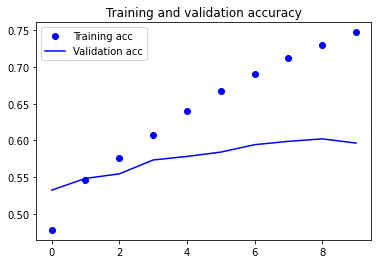

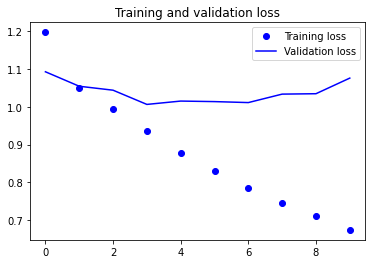

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_11.h5')
model.save('text_model_11.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #11 (Replicate as necessary for other models) (Batch 128) (not saved)


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
____________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 28s 130ms/step - loss: 1.4383 - acc: 0.4222 - val_loss: 1.4175 - val_acc: 0.4311
Epoch 2/10
213/213 [==============================] - 26s 121ms/step - loss: 1.3105 - acc: 0.4500 - val_loss: 1.2153 - val_acc: 0.4950
Epoch 3/10
213/213 [==============================] - 25s 119ms/step - loss: 1.1547 - acc: 0.5048 - val_loss: 1.1309 - val_acc: 0.5160
Epoch 4/10
213/213 [==============================] - 26s 122ms/step - loss: 1.0728 - acc: 0.5393 - val_loss: 1.1050 - val_acc: 0.5256
Epoch 5/10
213/213 [==============================] - 26s 122ms/step - loss: 1.0217 - acc: 0.5671 - val_loss: 1.0882 - val_acc: 0.5244
Epoch 6/10
213/213 [==============================] - 26s 121ms/step - loss: 0.9808 - acc: 0.5836 - val_loss: 1.0799 - val_acc: 0.5320
Epoch 7/10
213/213 [==============================] - 26s 121ms/step - loss: 0.9472 - acc: 0.5993 - val_loss: 1.0978 - val_acc: 0.5367
Epoch 8/10
213/213 [==============================] - 2

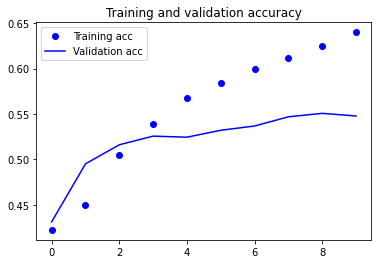

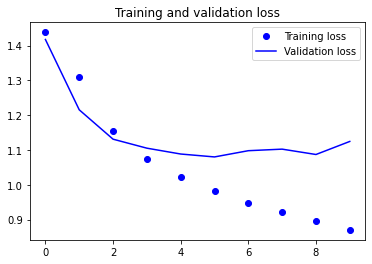

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_11.h5')
model.save('text_model_11.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #11 (Replicate as necessary for other models) (Reg)


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.LSTM(1024, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
____________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=Adam(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/10
13614/13614 [==============================] - 338s 25ms/step - loss: 1.5297 - acc: 0.4316 - val_loss: 1.2713 - val_acc: 0.4731
Epoch 2/10
13614/13614 [==============================] - 337s 25ms/step - loss: 1.2221 - acc: 0.4793 - val_loss: 1.1955 - val_acc: 0.4865
Epoch 3/10
13614/13614 [==============================] - 337s 25ms/step - loss: 1.1607 - acc: 0.5071 - val_loss: 1.1548 - val_acc: 0.5140
Epoch 4/10
13614/13614 [==============================] - 337s 25ms/step - loss: 1.1206 - acc: 0.5255 - val_loss: 1.1398 - val_acc: 0.5163
Epoch 5/10
13614/13614 [==============================] - 337s 25ms/step - loss: 1.0900 - acc: 0.5434 - val_loss: 1.1210 - val_acc: 0.5283
Epoch 6/10
13614/13614 [==============================] - 337s 25ms/step - loss: 1.0650 - acc: 0.5548 - val_loss: 1.1232 - val_acc: 0.5279
Epoch 7/10
13614/13614 [==============================] - 337s 25ms/step - loss: 1.0452 - acc: 0.5649 - val_loss: 1.1116 - val_acc: 0.5279
Epoch 8/10
13614/13614 [===

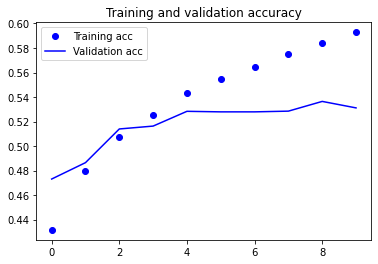

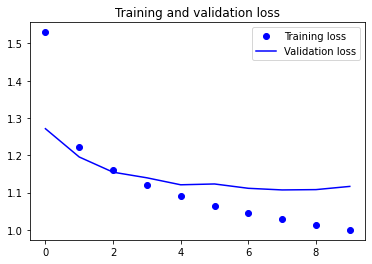

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_11_1.h5')
model.save('text_model_11_1.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #12 (Replicate as necessary for other models)


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.LSTM(1024, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
____________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 26s 124ms/step - loss: 2.2719 - acc: 0.4224 - val_loss: 1.7392 - val_acc: 0.4311
Epoch 2/10
213/213 [==============================] - 26s 122ms/step - loss: 1.5847 - acc: 0.4225 - val_loss: 1.4813 - val_acc: 0.4311
Epoch 3/10
213/213 [==============================] - 25s 117ms/step - loss: 1.3684 - acc: 0.4553 - val_loss: 1.2592 - val_acc: 0.4944
Epoch 4/10
213/213 [==============================] - 25s 119ms/step - loss: 1.1974 - acc: 0.5078 - val_loss: 1.1812 - val_acc: 0.5175
Epoch 5/10
213/213 [==============================] - 26s 120ms/step - loss: 1.1210 - acc: 0.5379 - val_loss: 1.1445 - val_acc: 0.5203
Epoch 6/10
213/213 [==============================] - 25s 119ms/step - loss: 1.0748 - acc: 0.5579 - val_loss: 1.1310 - val_acc: 0.5291
Epoch 7/10
213/213 [==============================] - 25s 119ms/step - loss: 1.0347 - acc: 0.5775 - val_loss: 1.1318 - val_acc: 0.5281
Epoch 8/10
213/213 [==============================] - 2

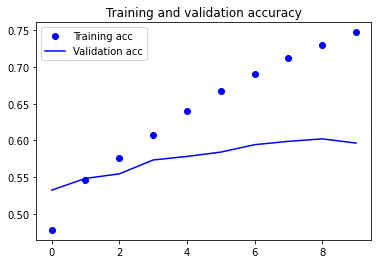

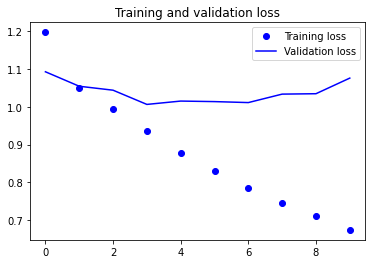

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_12.h5')
model.save('text_model_12.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #13 (Replicate as necessary for other models)


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 8)             80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
__________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-4, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/15
13614/13614 [==============================] - 319s 23ms/step - loss: 1.4341 - acc: 0.4224 - val_loss: 1.4242 - val_acc: 0.4311
Epoch 2/15
13614/13614 [==============================] - 317s 23ms/step - loss: 1.4291 - acc: 0.4225 - val_loss: 1.4237 - val_acc: 0.4311
Epoch 3/15
13614/13614 [==============================] - 316s 23ms/step - loss: 1.4287 - acc: 0.4225 - val_loss: 1.4242 - val_acc: 0.4311
Epoch 4/15
13614/13614 [==============================] - 315s 23ms/step - loss: 1.4284 - acc: 0.4225 - val_loss: 1.4235 - val_acc: 0.4311
Epoch 5/15
13614/13614 [==============================] - 317s 23ms/step - loss: 1.4281 - acc: 0.4225 - val_loss: 1.4222 - val_acc: 0.4311
Epoch 6/15
13614/13614 [==============================] - 317s 23ms/step - loss: 1.4273 - acc: 0.4225 - val_loss: 1.4219 - val_acc: 0.4311
Epoch 7/15
13614/13614 [==============================] - 317s 23ms/step - loss: 1.4251 - acc: 0.4225 - val_loss: 1.4188 - val_acc: 0.4311
Epoch 8/15
13614/13614 [===

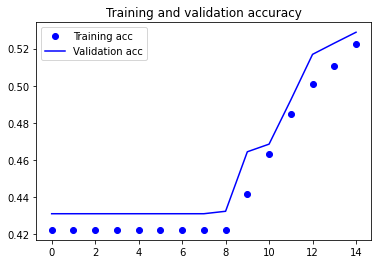

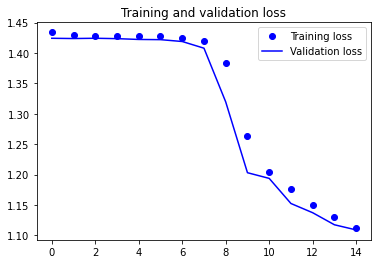

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_13.h5')
model.save('text_model_13.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #13_1 (Replicate as necessary for other models)


In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
____________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=1e-4, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/50
13614/13614 [==============================] - 316s 23ms/step - loss: 1.4363 - acc: 0.4225 - val_loss: 1.4233 - val_acc: 0.4311
Epoch 2/50
13614/13614 [==============================] - 316s 23ms/step - loss: 1.4289 - acc: 0.4225 - val_loss: 1.4262 - val_acc: 0.4311
Epoch 3/50
13614/13614 [==============================] - 315s 23ms/step - loss: 1.4288 - acc: 0.4225 - val_loss: 1.4231 - val_acc: 0.4311
Epoch 4/50
13614/13614 [==============================] - 318s 23ms/step - loss: 1.4286 - acc: 0.4225 - val_loss: 1.4248 - val_acc: 0.4311
Epoch 5/50
13614/13614 [==============================] - 315s 23ms/step - loss: 1.4281 - acc: 0.4225 - val_loss: 1.4230 - val_acc: 0.4311
Epoch 6/50
13614/13614 [==============================] - 315s 23ms/step - loss: 1.4277 - acc: 0.4225 - val_loss: 1.4220 - val_acc: 0.4311
Epoch 7/50
13614/13614 [==============================] - 314s 23ms/step - loss: 1.4266 - acc: 0.4225 - val_loss: 1.4209 - val_acc: 0.4311
Epoch 8/50
13614/13614 [===

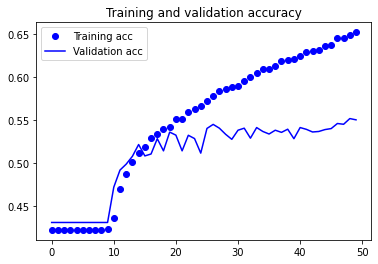

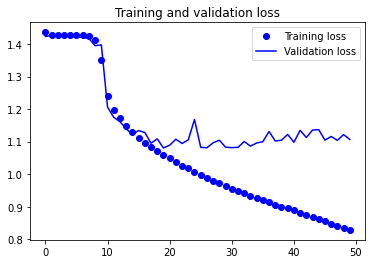

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_13_1.h5')
model.save('text_model_13_1.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #14 (model11 + 20e)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
____________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/20
13614/13614 [==============================] - 323s 24ms/step - loss: 1.1972 - acc: 0.4736 - val_loss: 1.0948 - val_acc: 0.5229
Epoch 2/20
13614/13614 [==============================] - 322s 24ms/step - loss: 1.0248 - acc: 0.5595 - val_loss: 1.0149 - val_acc: 0.5707
Epoch 3/20
13614/13614 [==============================] - 322s 24ms/step - loss: 0.9373 - acc: 0.5978 - val_loss: 0.9961 - val_acc: 0.5742
Epoch 4/20
13614/13614 [==============================] - 322s 24ms/step - loss: 0.8776 - acc: 0.6303 - val_loss: 0.9952 - val_acc: 0.5792
Epoch 5/20
13614/13614 [==============================] - 322s 24ms/step - loss: 0.8285 - acc: 0.6601 - val_loss: 0.9881 - val_acc: 0.5815
Epoch 6/20
13614/13614 [==============================] - 322s 24ms/step - loss: 0.7876 - acc: 0.6850 - val_loss: 1.0034 - val_acc: 0.5853
Epoch 7/20
13614/13614 [==============================] - 322s 24ms/step - loss: 0.7482 - acc: 0.7069 - val_loss: 1.0225 - val_acc: 0.5850
Epoch 8/20
13614/13614 [===

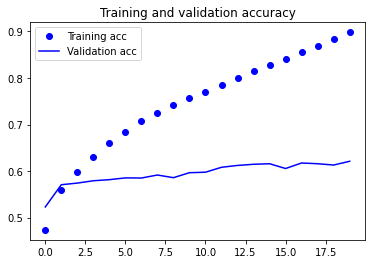

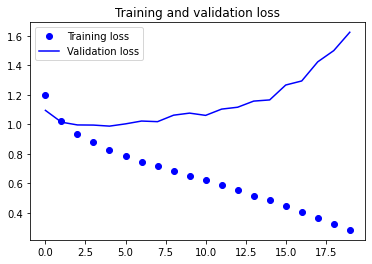

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_14.h5')
model.save('text_model_14.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #14_1 (model11 + 20e) + Reg

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(1024, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
dropout (Dropout)            (None, 34, 1024)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                3

In [ ]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/20
13614/13614 [==============================] - 340s 25ms/step - loss: 1.2924 - acc: 0.4612 - val_loss: 1.1520 - val_acc: 0.5184
Epoch 2/20
13614/13614 [==============================] - 338s 25ms/step - loss: 1.1109 - acc: 0.5290 - val_loss: 1.0957 - val_acc: 0.5358
Epoch 3/20
13614/13614 [==============================] - 336s 25ms/step - loss: 1.0521 - acc: 0.5556 - val_loss: 1.0936 - val_acc: 0.5445
Epoch 4/20
13614/13614 [==============================] - 335s 25ms/step - loss: 1.0175 - acc: 0.5758 - val_loss: 1.0884 - val_acc: 0.5329
Epoch 5/20
13614/13614 [==============================] - 335s 25ms/step - loss: 0.9908 - acc: 0.5891 - val_loss: 1.1047 - val_acc: 0.5404
Epoch 6/20
13614/13614 [==============================] - 335s 25ms/step - loss: 0.9704 - acc: 0.6050 - val_loss: 1.0891 - val_acc: 0.5436
Epoch 7/20
13614/13614 [==============================] - 335s 25ms/step - loss: 0.9525 - acc: 0.6130 - val_loss: 1.0855 - val_acc: 0.5470
Epoch 8/20
13614/13614 [===

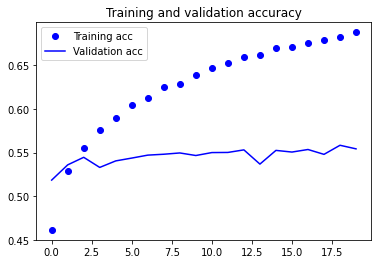

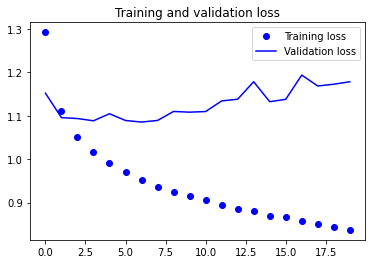

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_14_1.h5')
model.save('text_model_14_1.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #14_2 (model11 + 15e) + Reg

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True, kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(1024, kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
dropout (Dropout)            (None, 34, 1024)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                3

In [ ]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/15
851/851 [==============================] - 34s 40ms/step - loss: 1.8728 - acc: 0.4240 - val_loss: 1.2790 - val_acc: 0.4575
Epoch 2/15
851/851 [==============================] - 34s 40ms/step - loss: 1.2089 - acc: 0.4946 - val_loss: 1.1705 - val_acc: 0.5090
Epoch 3/15
851/851 [==============================] - 35s 41ms/step - loss: 1.1213 - acc: 0.5295 - val_loss: 1.1276 - val_acc: 0.5267
Epoch 4/15
851/851 [==============================] - 34s 40ms/step - loss: 1.0758 - acc: 0.5543 - val_loss: 1.1169 - val_acc: 0.5308
Epoch 5/15
851/851 [==============================] - 35s 41ms/step - loss: 1.0358 - acc: 0.5721 - val_loss: 1.1144 - val_acc: 0.5350
Epoch 6/15
851/851 [==============================] - 35s 41ms/step - loss: 1.0055 - acc: 0.5912 - val_loss: 1.1162 - val_acc: 0.5282
Epoch 7/15
851/851 [==============================] - 35s 41ms/step - loss: 0.9819 - acc: 0.5995 - val_loss: 1.1242 - val_acc: 0.5442
Epoch 8/15
851/851 [==============================] - 35s 41ms

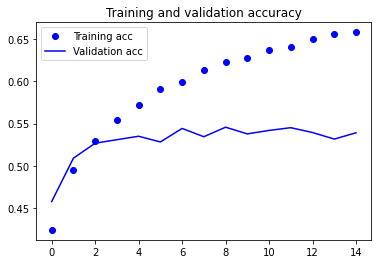

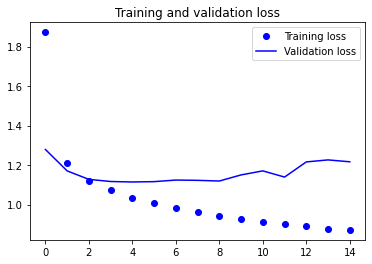

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_14_2.h5')
model.save('text_model_14_2.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #15 (model 10 + 50e) + batch 32

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 8)             80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
__________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/50
851/851 [==============================] - 35s 41ms/step - loss: 1.4318 - acc: 0.4225 - val_loss: 1.4235 - val_acc: 0.4311
Epoch 2/50
851/851 [==============================] - 35s 41ms/step - loss: 1.4265 - acc: 0.4225 - val_loss: 1.4191 - val_acc: 0.4311
Epoch 3/50
851/851 [==============================] - 35s 41ms/step - loss: 1.3989 - acc: 0.4242 - val_loss: 1.3517 - val_acc: 0.4412
Epoch 4/50
851/851 [==============================] - 35s 42ms/step - loss: 1.3221 - acc: 0.4430 - val_loss: 1.2911 - val_acc: 0.4558
Epoch 5/50
851/851 [==============================] - 35s 42ms/step - loss: 1.2658 - acc: 0.4589 - val_loss: 1.2426 - val_acc: 0.4664
Epoch 6/50
851/851 [==============================] - 36s 42ms/step - loss: 1.2224 - acc: 0.4751 - val_loss: 1.2051 - val_acc: 0.4808
Epoch 7/50
851/851 [==============================] - 36s 42ms/step - loss: 1.1915 - acc: 0.4849 - val_loss: 1.1828 - val_acc: 0.4894
Epoch 8/50
851/851 [==============================] - 36s 42ms

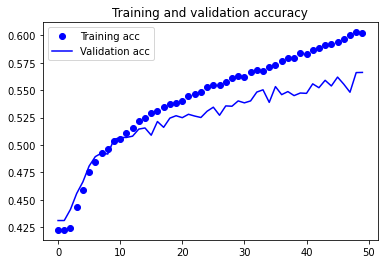

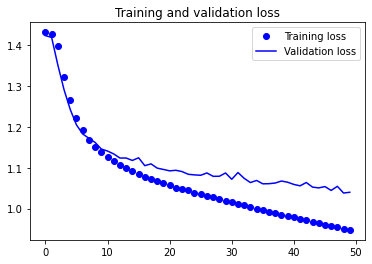

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_15.h5')
model.save('text_model_15.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #16 (model11 + 20e + SGD)

In [ ]:
# Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD

model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(layers.LSTM(1024, return_sequences=True))
model.add(layers.LSTM(1024))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 8)             80000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 34, 1024)          4231168   
_________________________________________________________________
lstm_5 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 12,736,837
Trainable params: 12,736,837
Non-trainable params: 0
__________________________________________

In [ ]:
# Train the Model

model.compile(optimizer=SGD(lr=5e-4,  momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=2,
                    validation_split=0.2)

Epoch 1/20
13614/13614 [==============================] - 317s 23ms/step - loss: 1.4323 - acc: 0.4224 - val_loss: 1.4266 - val_acc: 0.4311
Epoch 2/20
13614/13614 [==============================] - 316s 23ms/step - loss: 1.4268 - acc: 0.4225 - val_loss: 1.4082 - val_acc: 0.4311
Epoch 3/20
13614/13614 [==============================] - 316s 23ms/step - loss: 1.2780 - acc: 0.4370 - val_loss: 1.1824 - val_acc: 0.4678
Epoch 4/20
13614/13614 [==============================] - 317s 23ms/step - loss: 1.1677 - acc: 0.4846 - val_loss: 1.1344 - val_acc: 0.5118
Epoch 5/20
13614/13614 [==============================] - 318s 23ms/step - loss: 1.1202 - acc: 0.5094 - val_loss: 1.1082 - val_acc: 0.5207
Epoch 6/20
13614/13614 [==============================] - 319s 23ms/step - loss: 1.0861 - acc: 0.5294 - val_loss: 1.0978 - val_acc: 0.5213
Epoch 7/20
13614/13614 [==============================] - 320s 23ms/step - loss: 1.0622 - acc: 0.5406 - val_loss: 1.0763 - val_acc: 0.5339
Epoch 8/20
13614/13614 [===

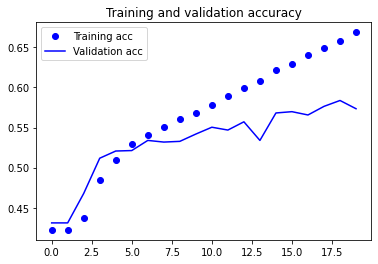

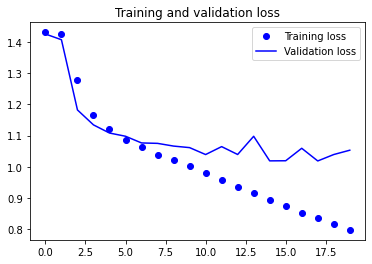

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'text_model_16.h5')
model.save('text_model_16.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

## Step 3 – Evaluate the Model using Testing Data 

In [ ]:
# Model #1 (replicate where necessary for other models)
model.load_weights('text_model_1.h5')


In [ ]:
# Save the Best Model
model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction

In [ ]:
model.load_weights('text_model_best.h5')

In [ ]:
# takes the user input
text_input = np.array([input()])

photgraphy


In [ ]:
# convert the user input into numeric tensor
import pandas as pd
def prediction(model, text_array, items_list):
    prob = model.predict(data)
    pro_df = pd.DataFrame(prob, columns = items_list)
    result = items_list[np.argmax(prob)]
    return pro_df, result

sequences = tokenizer.texts_to_sequences(text_input)
data = pad_sequences(sequences, maxlen=max_len)

In [ ]:
# show the model output using predict function
prediction(model, data, emoji_dictionary)

(          0         1         2         3         4
 0  0.334166  0.230341  0.067343  0.111208  0.256943, '😍')